# Churn Analysis - Telecommunications Industry

Customers are the important and integral part of any business to generate revenue for an organisation. Retaining customer is one of the important parts when it comes to prospering of a business and so is the case with the telecommunications industry with companies like Vodafone, Optus, Telstra. In this notebook, we are going to analyse the features given in the dataset to predict the churn rate succesfully with the features that affect the churn rate the most.

Importing required libraries to perform data analysis and predictions. 

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bp
from bokeh.models import HoverTool, OpenURL, TapTool
from bokeh.plotting import  show, output_file
from bokeh.embed import components

from sklearn import tree
import sklearn.feature_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC 
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score


We will be using the pandas library to perform data analysis. The dataset provided is as below. 

In [2]:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Exploring the dataset i.e. the number of rows, number of columns, features and any missing values. 

In [4]:
print('Number of rows: ', df.shape[0])
print('Number of Columns: ',df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Number of rows:  3333
Number of Columns:  21

Features : 
 ['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']

Missing values :   0

Unique values :  
 state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         

Checking and plotting the number of churn vs number of non- churn customers in the given dataset.

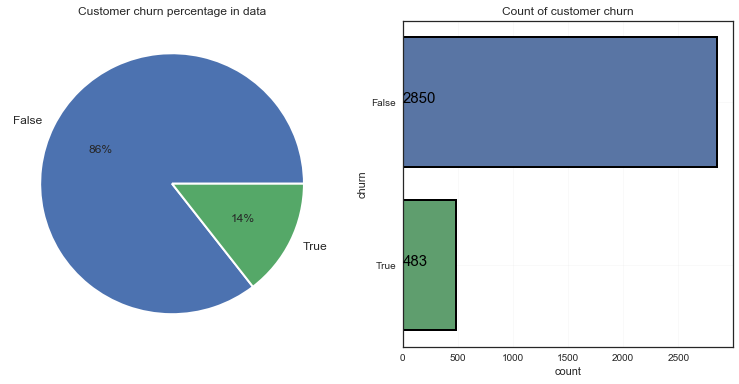

In [5]:
sns.set(style="darkgrid")
sns.set_style('white')

plt.figure(figsize=(13,6))
plt.subplot(121)
df["churn"].value_counts().plot.pie(autopct  = "%1.0f%%",
                                        fontsize = 12,
                                        wedgeprops = {"linewidth" : 2,
                                                      "edgecolor" : "w"},
                                       )
plt.title("Customer churn percentage in data")
plt.ylabel("")

plt.subplot(122)
ax = sns.countplot(y = df["churn"],linewidth = 2,
                   edgecolor = "k"*df["churn"].nunique())
for i,j in enumerate(df["churn"].value_counts().values) : 
    ax.text(.1,i,j,fontsize = 15,color = "k")
plt.title("Count of customer churn")
plt.grid(True,alpha = .1)
    
plt.show()

Calculating the churn percentage across all the states in the US.

In [6]:
states = df.groupby(['state','churn'])['churn'].agg({'Churn Percentage': 'count'})
state_churn_percentage = states.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
state_churn_percentage = state_churn_percentage.reset_index()
state_churn_percentage['churn'] = state_churn_percentage['churn'].astype(int)
state_churn_percentage = state_churn_percentage.query("churn == 1")
state_churn_percentage = state_churn_percentage.drop('churn', 1)

state_churn_percentage.sort_values(by='Churn Percentage', ascending=False).head()

/Users/mahatisuvvari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,state,Churn Percentage
63,NJ,26.470588
9,CA,26.470588
87,TX,25.000000
41,MD,24.285714
81,SC,23.333333


From the above, we can see the top 5 churn rates are in New Jersey, California, Texas, Maryland and South Carolina.

In [7]:
#Performing analysis on area code and if the churn rate is affected by the area code. 
area_code = df.groupby(['area code','churn'])['churn'].agg({'Churn count':'count'})
area_code = area_code.reset_index()
area_code


/Users/mahatisuvvari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,area code,churn,Churn count
0,408,False,716
1,408,True,122
2,415,False,1419
3,415,True,236
4,510,False,715
5,510,True,125


From the above, there is no significant relation in the number of churn customers to the number of non churn customers in any area code. It appears to be normal.

Dropping the features in the dataset, that are not affecting the churn rate to perform further analysis on other features.

In [8]:
df = df.drop(['state', 'area code', 'phone number'], axis = 1, inplace =False)

Creating a feature list which can be later used for filtering purposes.

In [9]:
feature_list = [ 'account length',  'international plan', 'voice mail plan', 'number vmail messages', 
                'total day minutes', 'total day calls','total day charge', 'total eve minutes', 
                'total eve calls', 'total eve charge', 'total night minutes', 'total night calls',
                'total night charge', 'total intl minutes','total intl calls', 'total intl charge', 
                'customer service calls']

Data mudging or Handling categorical variables so that it will be easy for further analysis.

In [10]:
#Data Mundging
df['churn'] = df['churn']. astype(int)

df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})

In [11]:
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no':0})

In [12]:
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Splitting features and the target variable for modelling. 

In [13]:
labels = df.churn
features = df.drop('churn',1)

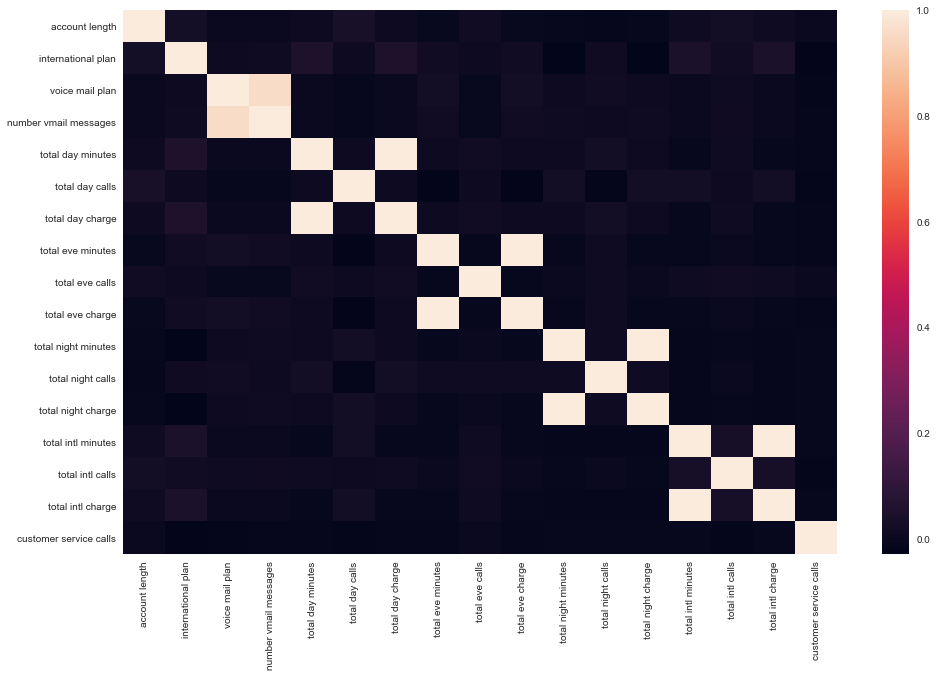

In [14]:
corr = features.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

From the matrix below, we can see that Total day charge, total evening charge, total night charge and  total international charge and the minutes respectively. So they can be removed for now and further analysis can be done on the other features.

### Exploring the distribution of continuous variables.

In [15]:
pos_international_calls = df[df['churn'] == 0]['total intl calls']
neg_international_calls = df[df['churn'] == 1]['total intl calls']

pos_international_minutes = df[df['churn'] == 0]['total intl minutes']
neg_international_minutes = df[df['churn'] == 1]['total intl minutes']


pos_night_calls = df[df['churn'] == 0]['total night calls']
neg_night_calls = df[df['churn'] == 1]['total night calls']

pos_night_minutes = df[df['churn'] == 0]['total night minutes']
neg_night_minutes = df[df['churn'] == 1]['total night minutes']

pos_evening_calls = df[df['churn'] == 0]['total eve calls']
neg_evening_calls = df[df['churn'] == 1]['total eve calls']

pos_evening_minutes = df[df['churn'] == 0]['total eve minutes']
neg_evening_minutes = df[df['churn'] == 1]['total eve minutes']

pos_day_calls = df[df['churn'] == 0]['total day calls']
neg_day_calls = df[df['churn'] == 1]['total day calls']

pos_day_minutes = df[df['churn'] == 0]['total day minutes']
neg_day_minutes = df[df['churn'] == 1]['total day minutes']



/Users/mahatisuvvari/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


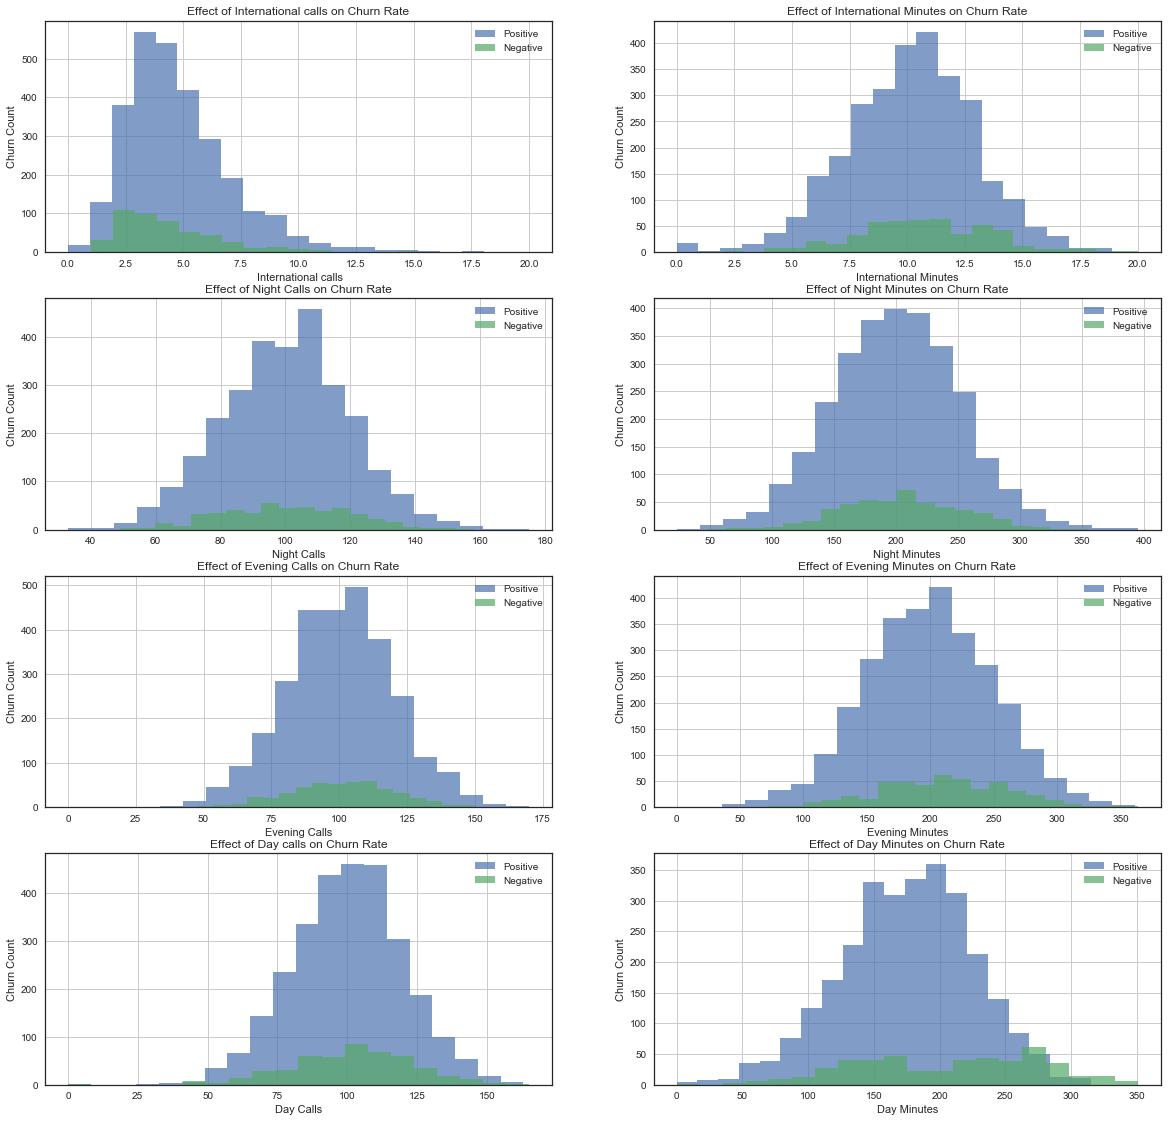

In [16]:
fig1 = plt.figure(figsize = (20,40))
ax1 = fig1.add_subplot(821)
ax1.set_xlabel(' International calls')
ax1.set_ylabel('Churn Count')
ax1.set_title('Effect of International calls on Churn Rate')
pos_international_calls.hist(bins = 20, alpha = 0.7, label = 'Positive')
ax2 = fig1.add_subplot(821)
neg_international_calls.hist(bins = 20, alpha = 0.7, label = 'Negative')
plt.legend(loc = 'upper right')

ax3 = fig1.add_subplot(822)
ax3.set_xlabel('International Minutes')
ax3.set_ylabel('Churn Count')
ax3.set_title('Effect of International Minutes on Churn Rate')
pos_international_minutes.hist(bins = 20, alpha = 0.7, label = 'Positive')
ax4 = fig1.add_subplot(822)
neg_international_minutes.hist(bins = 20, alpha = 0.7,  label = 'Negative')
plt.legend(loc = 'upper right')


ax5 = fig1.add_subplot(823)
ax5.set_xlabel('Night Calls')
ax5.set_ylabel('Churn Count')
ax5.set_title('Effect of Night Calls on Churn Rate')
pos_night_calls.hist(bins = 20, alpha = 0.7,  label = 'Positive')
ax6 = fig1.add_subplot(823)
neg_night_calls.hist(bins = 20, alpha = 0.7,  label = 'Negative')
plt.legend(loc = 'upper right')

ax7 = fig1.add_subplot(824)
ax7.set_xlabel('Night Minutes')
ax7.set_ylabel('Churn Count')
ax7.set_title('Effect of Night Minutes on Churn Rate')
pos_night_minutes.hist(bins = 20, alpha = 0.7, label = 'Positive')
ax8 = fig1.add_subplot(824)
neg_night_minutes.hist(bins = 20, alpha = 0.7, label = 'Negative')
plt.legend(loc = 'upper right')

ax9 = fig1.add_subplot(825)
ax9.set_xlabel('Evening Calls')
ax9.set_ylabel('Churn Count')
ax9.set_title('Effect of Evening Calls on Churn Rate')
pos_evening_calls.hist(bins = 20, alpha = 0.7,  label = 'Positive')
ax10 = fig1.add_subplot(825)
neg_evening_calls.hist(bins = 20, alpha = 0.7,  label = 'Negative')
plt.legend(loc = 'upper right')

ax11 = fig1.add_subplot(826)
ax11.set_xlabel('Evening Minutes')
ax11.set_ylabel('Churn Count')
ax11.set_title('Effect of Evening Minutes on Churn Rate')
pos_evening_minutes.hist(bins = 20, alpha = 0.7,  label = 'Positive')
ax12 = fig1.add_subplot(826)
neg_evening_minutes.hist(bins = 20, alpha = 0.7,  label = 'Negative')
plt.legend(loc = 'upper right')


ax13 = fig1.add_subplot(827)
ax13.set_xlabel('Day Calls')
ax13.set_ylabel('Churn Count')
ax13.set_title('Effect of Day calls on Churn Rate')
pos_day_calls.hist(bins = 20, alpha = 0.7,  label = 'Positive')
ax14 = fig1.add_subplot(827)
neg_day_calls.hist(bins = 20, alpha = 0.7,  label = 'Negative')
plt.legend(loc = 'upper right')

ax15 = fig1.add_subplot(828)
ax15.set_xlabel('Day Minutes')
ax15.set_ylabel('Churn Count')
ax15.set_title('Effect of Day Minutes on Churn Rate')
pos_day_minutes.hist(bins = 20, alpha = 0.7,  label = 'Positive')
ax16 = fig1.add_subplot(828)
neg_day_minutes.hist(bins = 20, alpha = 0.7,  label = 'Negative')
plt.legend(loc = 'upper right')



From the above plots, the churn rate appears to be more when it comes to total day minutes after 250 calls. This is an important factor as this may contribute to the affect of churn. 

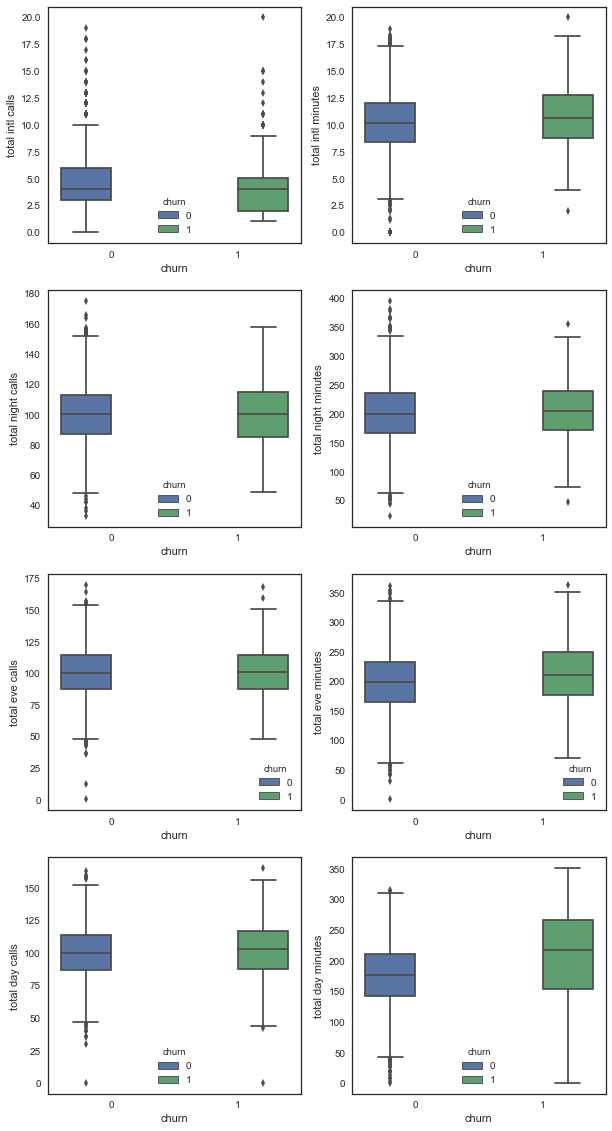

In [17]:
fig2 = plt.figure(figsize = (10,20))
ax17 = fig2.add_subplot(421) 
sns.boxplot('churn', 'total intl calls', data = df, hue= 'churn')
ax18 = fig2.add_subplot(422)
sns.boxplot('churn', 'total intl minutes', data = df, hue= 'churn')
ax19 = fig2.add_subplot(423)
sns.boxplot('churn', 'total night calls', data = df, hue= 'churn')
ax20 = fig2.add_subplot(424)
sns.boxplot('churn', 'total night minutes', data = df, hue= 'churn')
ax21 = fig2.add_subplot(425)
sns.boxplot('churn', 'total eve calls', data = df, hue= 'churn')
ax22 = fig2.add_subplot(426)
sns.boxplot('churn', 'total eve minutes', data = df, hue= 'churn')
ax23 = fig2.add_subplot(427)
sns.boxplot('churn', 'total day calls', data = df, hue= 'churn')
ax24 = fig2.add_subplot(428)
sns.boxplot('churn', 'total day minutes', data = df, hue= 'churn')

From the box plots below, we notie that the number of calls during the day, evening, night and international are very similar but the total number of minutes or the call duration appears to be more in the churn population. 

### Feature Exploration

In [19]:
pos_account_length = df[df['churn'] == 0]['account length']
neg_account_length = df[df['churn'] == 1]['account length']

pos_number_voicemail = df[df['churn'] == 0]['number vmail messages']
neg_number_voicemail = df[df['churn'] == 1]['number vmail messages']



/Users/mahatisuvvari/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


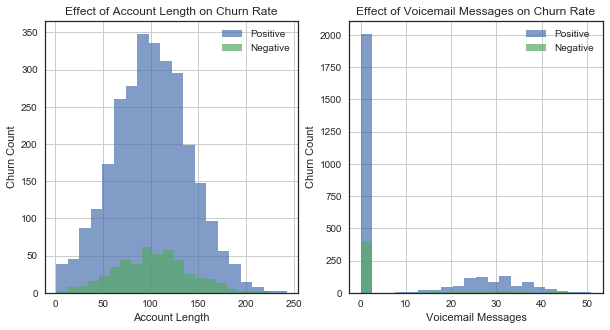

In [20]:
fig4 = plt.figure(figsize = (10,5))

ax3 = fig4.add_subplot(121)
ax3.set_xlabel('Account Length')
ax3.set_ylabel('Churn Count')
ax3.set_title('Effect of Account Length on Churn Rate')
pos_account_length.hist(bins = 20, alpha = 0.7,  label = 'Positive')
ax4 = fig4.add_subplot(121)
neg_account_length.hist(bins = 20, alpha = 0.7,  label = 'Negative')
plt.legend(loc = 'upper right')


ax3 = fig4.add_subplot(122)
ax3.set_xlabel('Voicemail Messages')
ax3.set_ylabel('Churn Count')
ax3.set_title('Effect of Voicemail Messages on Churn Rate')
pos_number_voicemail.hist(bins = 20, alpha = 0.7, label = 'Positive')
ax4 = fig4.add_subplot(122)
neg_number_voicemail.hist(bins = 20, alpha = 0.7, label = 'Negative')
plt.legend(loc = 'upper right')

From the above plot, the distribution appears to be very similar when compared to the churn and the non churn population.

### Exploring Churn for Categorical variables.

In [21]:
pos_customer_service = df[df['churn']  == 0]['customer service calls']
neg_customer_service = df[df['churn']  == 1]['customer service calls']

pos_international_plan = df[df['churn'] == 0]['international plan']
neg_international_plan = df[df['churn'] == 1]['international plan']

pos_voicemail_plan = df[df['churn'] == 0]['voice mail plan']
neg_voicemail_plan = df[df['churn'] == 1]['voice mail plan']

/Users/mahatisuvvari/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


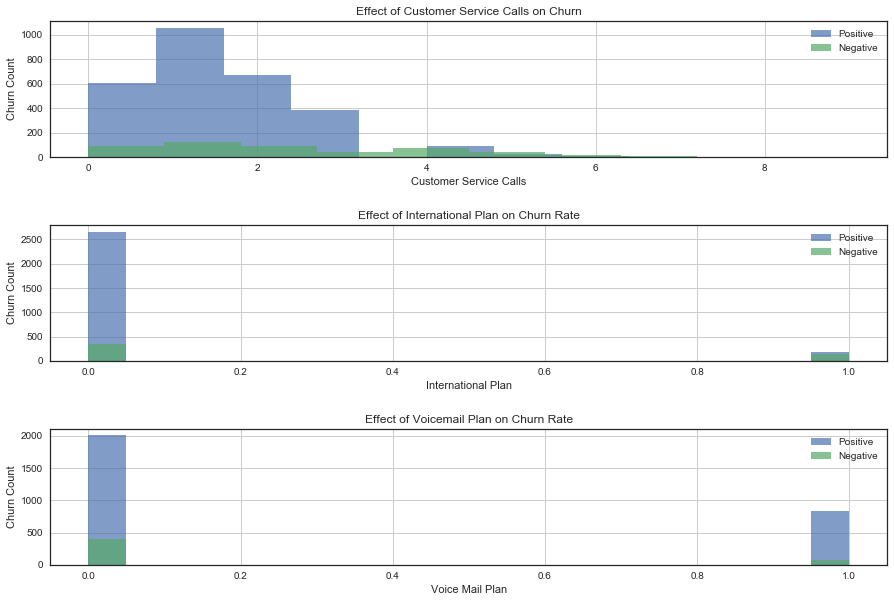

In [22]:
fig3 = plt.figure(figsize = (15,10))
fig3.subplots_adjust(hspace=0.5, wspace=0.5)
ax19 = fig3.add_subplot(311)
plt.title('Effect of Customer Service Calls on Churn')
pos_customer_service.hist(alpha = 0.7, bins = 10, label = 'Positive')
ax19 = fig3.add_subplot(311)
neg_customer_service.hist(alpha = 0.7, bins = 10, label = 'Negative')
plt.legend(loc = 'upper right')
plt.xlabel('Customer Service Calls')
plt.ylabel('Churn Count')

ax20 = fig3.add_subplot(312)
ax20.set_xlabel('International Plan')
ax20.set_ylabel('Churn Count')
ax20.set_title('Effect of International Plan on Churn Rate')
pos_international_plan.hist(bins = 20, alpha = 0.7,  label = 'Positive')
ax21 = fig3.add_subplot(312)
neg_international_plan.hist(bins = 20, alpha = 0.7, label = 'Negative')
plt.legend(loc = 'upper right')

ax22 = fig3.add_subplot(313)
ax22.set_xlabel('Voice Mail Plan')
ax22.set_ylabel('Churn Count')
ax22.set_title('Effect of Voicemail Plan on Churn Rate')
pos_voicemail_plan.hist(bins = 20, alpha = 0.7, label = 'Positive')
ax23 = fig3.add_subplot(313)
neg_voicemail_plan.hist(bins = 20, alpha = 0.7, label = 'Negative')
plt.legend(loc = 'upper right')

There are two important observations that can be made from the above graphs. 
1. There is an increase in the churn population after 3 customer service calls and also there is an absence of non churn population. This may be a very important factor contributing to the churn rate. 
2. When compared to voice mail plan and international plan, it appears that customers with international plan are higher in number in the churn population. Probably the international plan features should be explored more as this may be contributing to the churn rate. 

Dividing the dataset into train and test sets for further analysis and feature reduction. 

In [23]:
features_train, features_test,labels_train, labels_test = train_test_split(features, labels, train_size = 0.7)

/Users/mahatisuvvari/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [24]:
print("Training Size: {}, Testing Size: {}".format(len(features_train), len(features_test)))
print("Training Size: {}, Testing Size: {}".format(len(labels_train), len(labels_test)))


Training Size: 2333, Testing Size: 1000
Training Size: 2333, Testing Size: 1000


## PCA Analysis.

In [46]:
from sklearn.preprocessing import StandardScaler

standardized_features = StandardScaler().fit_transform(features)

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(standardized_features)

Text(0.5,1,'Scatterplot of a 17D dataset reduced to 2D using t-SNE')

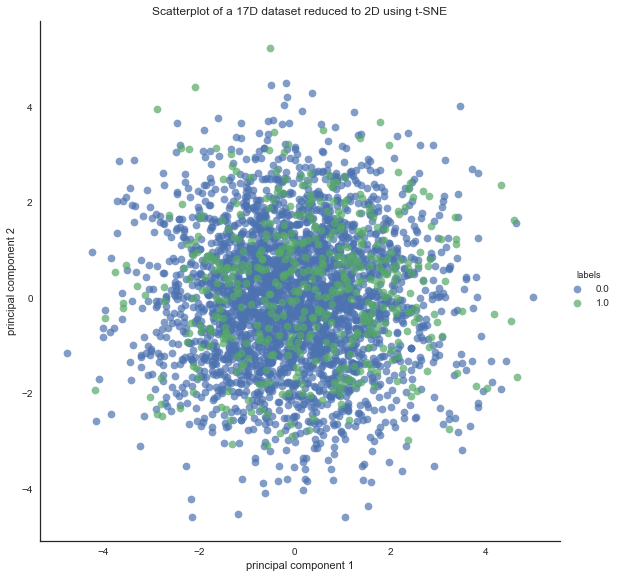

In [48]:
principalComponents = np.vstack((principalComponents.T, labels)).T
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'labels'])
g = sns.lmplot('principal component 1', 'principal component 2', data = principalDf, hue = 'labels', fit_reg=False, size=8
                ,scatter_kws={'alpha':0.7,'s':60})
g.axes.flat[0].set_title('Scatterplot of a 17D dataset reduced to 2D using t-SNE')


## Outlier Detection.

Checking for any outliers in the selected features.

In [50]:
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    _ = q3 - q1
    tukey_formula_floor = q1 - 1.5 * _
    tukey_formula_ceiling = q3 + 1.5 * _
    outlier_indices = list(x.index[(x< tukey_formula_floor)| (x > tukey_formula_ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

tukey_indices, tukey_values = find_outliers_tukey(features['total day minutes'])

print (tukey_values)

[332.9, 337.4, 326.5, 350.8, 335.5, 30.9, 34.0, 334.3, 346.8, 12.5, 25.9, 0.0, 0.0, 19.5, 329.8, 7.9, 328.1, 27.0, 17.6, 326.3, 345.3, 2.6, 7.8, 18.9, 29.9]


### Feature Selection and Elimination

There are different ways select the most important features. Logistic Regression is one of the easiest way for feature extraction and selection as there is no need for scaling the features. Below are few methods on features extraction and the most relevant features will be selected for modelling. 

Feature Extraction using 

1. logistic regression base with RFE
2. Extra Trees Classifier.
3. Select K best.
4. Random Forest Classifier.

The idea is to select the features with the highest frequency using the above techniques

In [36]:
# Recursive Feature Elimination
# create a base classifier used to evaluate a subset of attributes
model1 = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model1, 3)
rfe = rfe.fit(features_train,labels_train)
# summarize the selection of the attributes
indices_selected = rfe.get_support(indices = True)
columnnames_selected = [features_train.columns[x] for x in indices_selected]

features_train_selected_rfe = features_train[columnnames_selected]
features_test_selected_rfe = features_test[columnnames_selected]
features_train_selected_rfe.columns

Index(['international plan', 'voice mail plan', 'customer service calls'], dtype='object')

Using RFE model, the top 3 features which effect the churn rate are ['international plan', 'voice mail plan', 'customer service calls']. Similarly, we will use other techniques for feature reduction and will pick the most repeated features for further modelling.

('account length', 0.039832068181154159)
('international plan', 0.074854950217529123)
('voice mail plan', 0.023977886507567846)
('number vmail messages', 0.014936151050989943)
('total day minutes', 0.13320505694743584)
('total day calls', 0.035140816027605534)
('total day charge', 0.11576579269185201)
('total eve minutes', 0.0581626577380032)
('total eve calls', 0.034892986959187119)
('total eve charge', 0.062490974277715952)
('total night minutes', 0.039367690430520942)
('total night calls', 0.037562994371591343)
('total night charge', 0.040791379880290773)
('total intl minutes', 0.052831413712135636)
('total intl calls', 0.064856690606436229)
('total intl charge', 0.0507786830876263)
('customer service calls', 0.12055180731235804)
Index(['total day minutes', 'total day charge', 'customer service calls'], dtype='object')


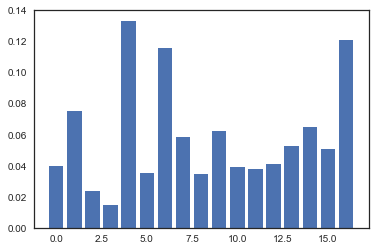

In [37]:


# fit an Extra Trees model to the data
model2 = ExtraTreesClassifier()
model2.fit(features_train, labels_train)
# display the relative importance of each attribute
for feature in zip(feature_list, model2.feature_importances_):
    print(feature)

# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.10
sfm = SelectFromModel(model2, threshold=0.10)

# Train the selector
sfm.fit(features_train, labels_train)

# summarize the selection of the attributes
indices_selected = sfm.get_support(indices = True)
columnnames_selected = [features_train.columns[x] for x in indices_selected]

features_train_selected_trees = features_train[columnnames_selected]
features_test_selected_trees = features_test[columnnames_selected]

print(features_train_selected_trees.columns)
plt.bar(range(len(model2.feature_importances_)), model2.feature_importances_)
plt.show()

The features selected using the extra trees model gave 'total day minutes', 'total day charge', 'customer service calls' as the top 3 important features.

In [38]:
select = sklearn.feature_selection.SelectKBest(k = 3)
selected_features = select.fit(features_train, labels_train)
indices_selected = selected_features.get_support(indices = True)
columnnames_selected = [features_train.columns[x] for x in indices_selected]

features_train_selected = features_train[columnnames_selected]
features_test_selected = features_test[columnnames_selected]

features_train_selected.columns


Index(['international plan', 'total day charge', 'customer service calls'], dtype='object')

The features selected using the selectKbest model gave 'international plan', 'total day minutes', 'total day charge' as the top 3 important features.

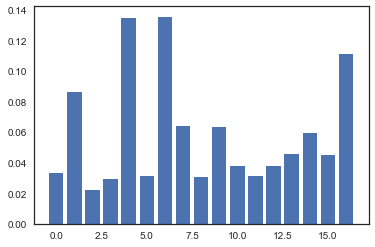

Index(['total day minutes', 'total day charge', 'customer service calls'], dtype='object')

In [39]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(features_train, labels_train)

plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()
    
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.10
sfm = SelectFromModel(clf, threshold=0.10)

# Train the selector
sfm.fit(features_train, labels_train)

indices_selected = sfm.get_support(indices = True)
columnnames_selected = [features_train.columns[x] for x in indices_selected]

features_train_selected_random = features_train[columnnames_selected]
features_test_selected_random = features_test[columnnames_selected]

features_train_selected_random.columns


The features selected using the Random Forest Classifier model gave 'total day minutes', 'total day charge', 'customer service calls' as the top 3 important features.

From the above, we can see that 'international plan' has a lot of affect on the churn. As we observed earlier, the more the customer service calls, the more the churn was. So Customer service calls also look appear to be important. The third feature, we are going to use will be total day minutes as total day charge is correlated to total day minutes. From the visualisations before, total day minutes and voice mail plan appeared to have more churn rate. For modelling, we have selected total day minutes. Going forward, we can also replace that with voice mail plan and see if that increases the accuracy of our classifiers.

Based on the above there are a few recommendations which can reduce churn. They are as below.

1. The international call plan should be checked to understand the grievances of the customers and the reason for churn.
2. Customer service calls should be closely monitored and the level of customer service which would include the processing time, types of complains should be checked and analysed in detail.
3. Look into customers with higher call rates and find out more about their intent to churn and offer remedies.

### Model Performance with the selected features.

We are going to check which model predicts the best using different machine learning models. 


In [51]:
# The selected features are in the dummy list for filtering.
dummy_list = ['international plan', 'total day charge', 'customer service calls']
features_train_selected = features_train[dummy_list]
features_test_selected = features_test[dummy_list]

In [53]:
#Plotting confusion matrix for better understanding of the TP, FP, TN, FN and also to measure the accuracy of the models.

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Using the RFE model to check the performance on the features selected by the model. Note: These are not the features that have been streamlined earlier ('international plan', 'total day charge', 'customer service calls') 

##### Logits with RFE

Accuracy:  0.845
AUC: 0.810


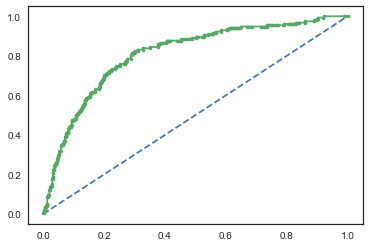

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools
rfe = rfe.fit(features_train_selected,labels_train)
labels_predict_rfe = rfe.predict(features_test_selected)
num_classes = [True, False]
cm = confusion_matrix(labels_test, labels_predict_rfe)
print('Accuracy: ',accuracy_score(labels_test, labels_predict_rfe))

# predict probabilities
prob = rfe.predict_proba(features_test_selected)
# keep probabilities for the positive outcome only
prob = prob[:, 1]
# calculate AUC
auc_rfe = roc_auc_score(labels_test, prob)
print('AUC: %.3f' % auc_rfe)
# calculate roc curve
fpr_rfe, tpr_rfe, thresholds = roc_curve(labels_test, prob)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_rfe, tpr_rfe, label = 'Logit',marker='.')
# show the plot
plt.show()

Confusion matrix, without normalization
[[829  17]
 [138  16]]


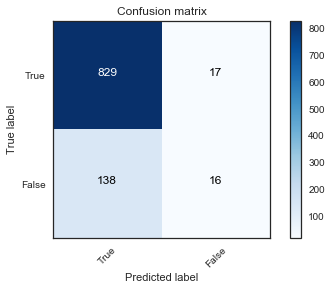

In [64]:
plot_confusion_matrix(cm, num_classes)

This model shows an AUC of 0.84 which is an average model. The closer the value is to 1, the better the model is. 

##### Extra Trees Classifier

Accuracy:  0.854
AUC: 0.735


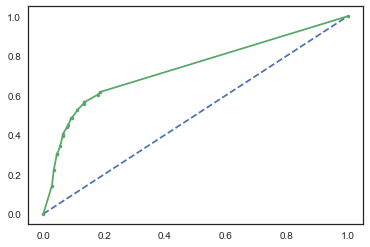

In [65]:
model2.fit(features_train_selected_trees, labels_train)
labels_predict_trees = model2.predict(features_test_selected_trees)
cm = confusion_matrix(labels_test, labels_predict_trees)

print('Accuracy: ',accuracy_score(labels_test, labels_predict_trees))

# predict probabilities
prob = model2.predict_proba(features_test_selected_trees)
# keep probabilities for the positive outcome only
prob = prob[:, 1]
# calculate AUC
auc_trees = roc_auc_score(labels_test, prob)
print('AUC: %.3f' % auc_trees)
# calculate roc curve
fpr_trees, tpr_trees, thresholds = roc_curve(labels_test, prob)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_trees, tpr_trees, marker='.')
# show the plot
plt.show()

Confusion matrix, without normalization
[[792  54]
 [ 92  62]]


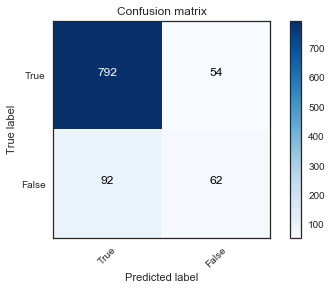

In [66]:
plot_confusion_matrix(cm, num_classes)

The area under the curve for the extra trees model has significantly decreased to the above model. This can be eliminated.

###### Random Forest Classifier

Confusion matrix, without normalization
[[787  59]
 [ 93  61]]


0.84799999999999998

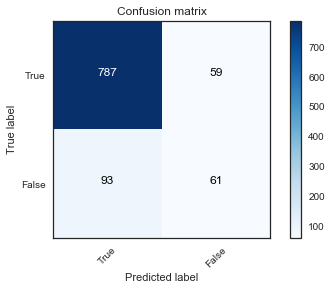

In [67]:
clf.fit(features_train_selected_random, labels_train)
labels_predict_random = clf.predict(features_test_selected_random)
cm = confusion_matrix(labels_test, labels_predict_random)
plot_confusion_matrix(cm, num_classes)
accuracy_score(labels_test, labels_predict_random)

AUC: 0.758


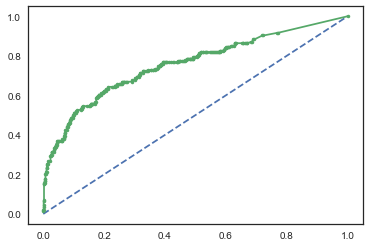

In [68]:
# predict probabilities
prob = clf.predict_proba(features_test_selected_random)
# keep probabilities for the positive outcome only
prob = prob[:, 1]
# calculate AUC
auc_random = roc_auc_score(labels_test, prob)
print('AUC: %.3f' % auc_random)
# calculate roc curve
fpr_random, tpr_random, thresholds = roc_curve(labels_test, prob)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_random, tpr_random, marker='.')
# show the plot
plt.show()

The AUC is 0.758 which is less than expected. This model needs parameters tuning.

##### Plotting the performance of all the above models. 



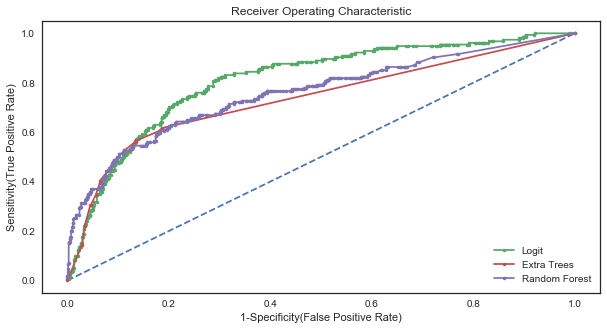

In [82]:
plt.figure(0, figsize=(10,5)).clf()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_rfe, tpr_rfe, label = 'Logit',marker='.')
plt.plot(fpr_trees, tpr_trees, label = 'Extra Trees',marker='.')
plt.plot(fpr_random, tpr_random, label = 'Random Forest', marker='.')
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Predictive modelling

##### Gradient Boosting Classifier

In [93]:
GB_model = GradientBoostingClassifier()

In [94]:
GB_model.fit(features_train_selected, labels_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [95]:
labels_predict_GB = GB_model.predict(features_test_selected)

Confusion matrix, without normalization
[[823  23]
 [ 93  61]]


0.88400000000000001

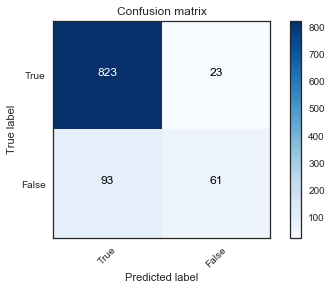

In [96]:
cm = confusion_matrix(labels_test, labels_predict_GB)

plot_confusion_matrix(cm, num_classes)
accuracy_score(labels_test, labels_predict_GB)


AUC: 0.847


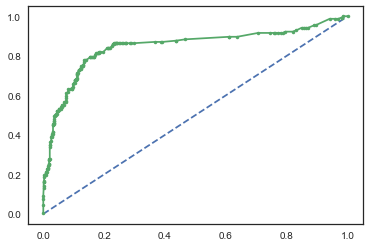

In [97]:
# predict probabilities
prob = GB_model.predict_proba(features_test_selected)
# keep probabilities for the positive outcome only
prob = prob[:, 1]
# calculate AUC
auc_GB = roc_auc_score(labels_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr_GB, tpr_GB, thresholds = roc_curve(labels_test, prob)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_GB, tpr_GB, marker='.')
# show the plot
plt.show()

##### XGBoost Classifier

In [116]:
XGB_model = XGBClassifier()

In [117]:
XGB_model.fit(features_train_selected, labels_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [118]:
labels_predict_XGB = XGB_model.predict(features_test_selected)


Confusion matrix, without normalization
[[819  27]
 [ 89  65]]


0.88400000000000001

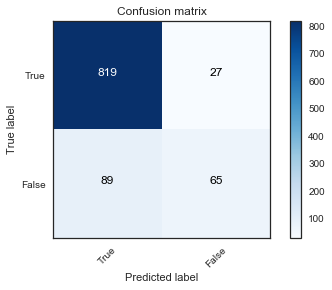

In [119]:
cm = confusion_matrix(labels_test, labels_predict_XGB)

plot_confusion_matrix(cm, num_classes)
accuracy_score(labels_test, labels_predict_XGB)

AUC: 0.849


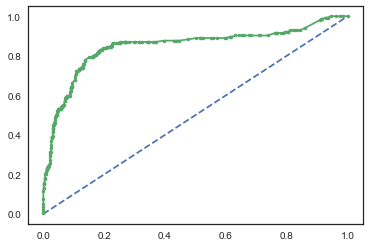

In [120]:
# predict probabilities
prob = XGB_model.predict_proba(features_test_selected)
# keep probabilities for the positive outcome only
prob = prob[:, 1]
# calculate AUC
auc_XGB = roc_auc_score(labels_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr_XGB, tpr_XGB, thresholds = roc_curve(labels_test, prob)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_XGB, tpr_XGB, marker='.')
# show the plot
plt.show()

##### Support Vector Machines

In [136]:
svclassifier = SVC(kernel='linear', probability = True)  
svclassifier.fit(features_train_selected, labels_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [137]:
labels_pred = svclassifier.predict(features_test_selected) 

Confusion matrix, without normalization
[[846   0]
 [154   0]]


0.84599999999999997

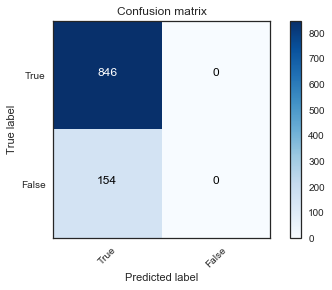

In [138]:
cm = confusion_matrix(labels_test, labels_pred)

plot_confusion_matrix(cm, num_classes)

accuracy_score(labels_test, labels_pred)

AUC: 0.849


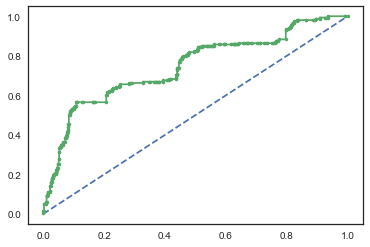

In [139]:
# predict probabilities
prob = svclassifier.predict_proba(features_test_selected)
# keep probabilities for the positive outcome only
prob = prob[:, 1]
# calculate AUC
auc_SV = roc_auc_score(labels_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr_SV, tpr_SV, thresholds = roc_curve(labels_test, prob)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_SV, tpr_SV, marker='.')
# show the plot
plt.show()

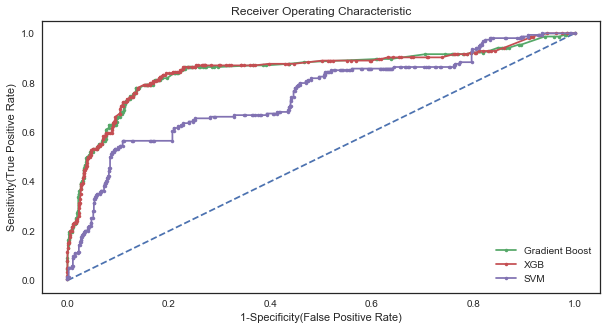

In [142]:
plt.figure(0, figsize=(10,5)).clf()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_GB, tpr_GB, label = 'Gradient Boost', marker='.')
plt.plot(fpr_XGB, tpr_XGB, label = 'XGB', marker='.')
plt.plot(fpr_SV, tpr_SV, label = "SVM", marker='.')
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The ROC curve shows the best model and check the performance of all the classifiers. It appears that GB,XGB and SVC did a good job in predicting churn. As the higher the AUC the better the models predictive power to check if the customers have churned our not churned. The accuracy and AUC can be improved by removing outliers and selecting more features. XGB marginally outperformed the other models. 